# Create Plots for Michigan State vs Opponents using the Master Roster 2023 file

In [9]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## Set the background image for the plot
# Load the image
img = mpimg.imread('../images/backgrounds/bc2.png')

path = '../data/rosters/2023_master_roster.csv'

# Read in CSV
df = pd.read_csv(path)

# Image Paths to be used in the plot
# Load logos
msu_logo = plt.imread('../images/logos/msu.png')
bc_logo = plt.imread('../images/logos/bc_.png')

team_colors = {'Michigan-State': 'darkgreen', 'Boston-College': 'maroon'}

### ORIG UGLY AS HELLL
# font_title_param = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 28}
# font_tick_param = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}
# font_label_param = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 22}
# font_tick_param = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}

font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 28}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 16}




## Create Three Plots of the Height Data
- Density Plot: Shows the smoothed frequency distribution of height for each position.
- Strip Plot with Jitter: Individual data points for height are spread across each position, with jitter added to better differentiate closely packed points.
- Box Plot with Swarm: Combines a box plot showing summary statistics with individual data points.

In [10]:
# # Create subplots for Density Plot, Strip Plot with Jitter, and Box Plot with Swarm
# fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# # --- Density Plot for Height by Position ---
# sns.kdeplot(data=df, x='Height_Inches', hue='Position', common_norm=False, ax=axes[0], fill=True)
# axes[0].set_title('Density Plot for Height by Position')
# axes[0].set_xlabel('Height (inches)')
# axes[0].set_ylabel('Density')

# # --- Strip Plot with Jitter for Height by Position ---
# sns.stripplot(x='Position', y='Height_Inches', data=df, jitter=True, alpha=0.5, ax=axes[1])
# axes[1].set_title('Strip Plot with Jitter for Height by Position')
# axes[1].set_xlabel('Position')
# axes[1].set_ylabel('Height (inches)')

# # --- Box Plot with Swarm for Height by Position ---
# sns.boxplot(x='Position', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=axes[2])
# sns.swarmplot(x='Position', y='Height_Inches', data=df, color='black', alpha=0.5, ax=axes[2])
# axes[2].set_title('Box Plot with Swarm for Height by Position')
# axes[2].set_xlabel('Position')
# axes[2].set_ylabel('Height (inches)')

# plt.tight_layout()
# plt.show()


## Box Plot with Swarm:
### Combines a box plot showing summary statistics with individual data points.

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


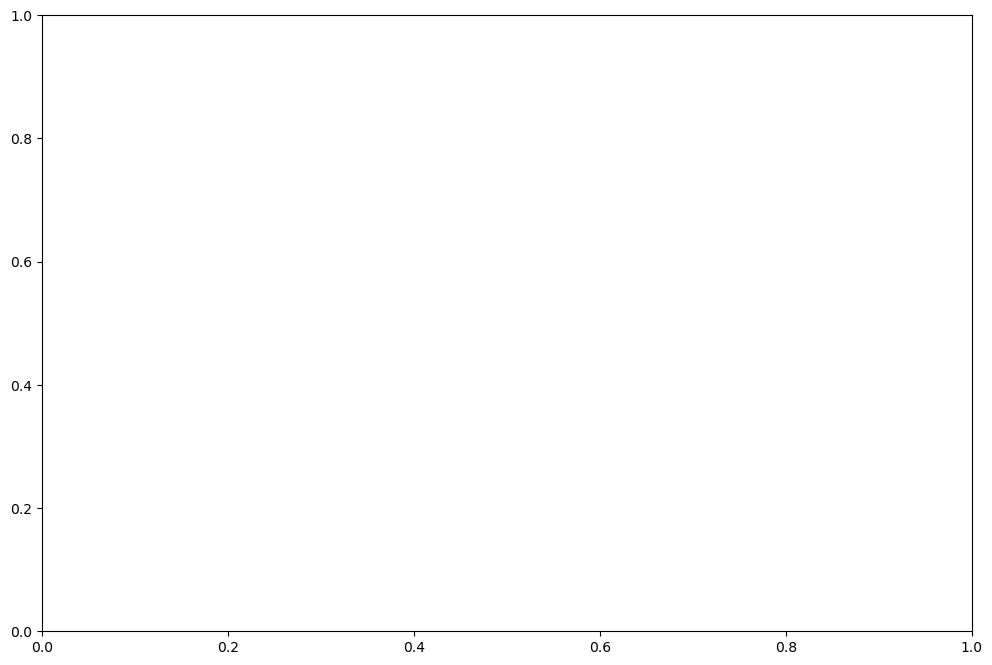

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


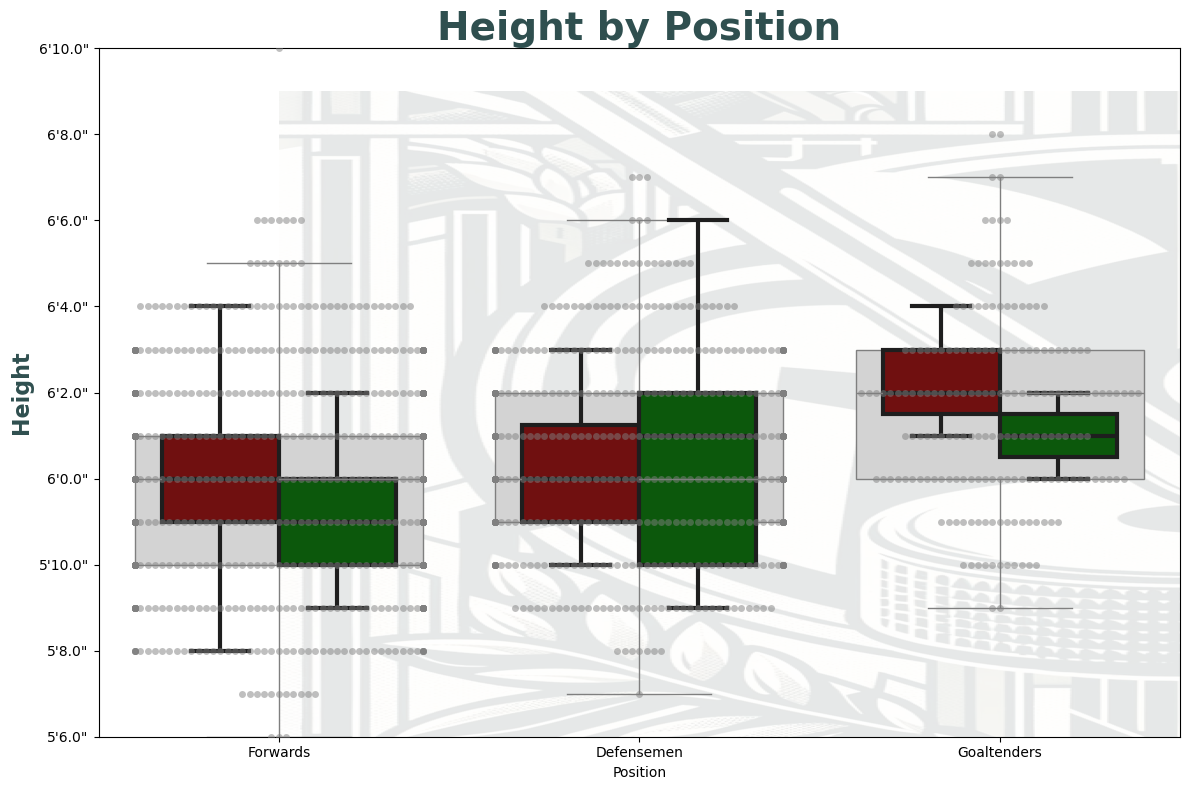

In [11]:
# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

df_filtered = df[(df['School'] == 'Michigan-State') | (df['School'] == 'Boston-College')]
# Create a subplot for the Box Plot with Swarm for height, grouped by Position
fig, ax = plt.subplots(1, 1, figsize=(12, 8))




# Create a subplot for the Box Plot with Swarm for height, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set Axis ranges
ax.set_xlim([0, 5])
ax.set_ylim([66, 81])

# Display the image
ax.imshow(img, aspect='auto', extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], alpha=0.1)  # Adjust alpha for opacity


# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Position', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=ax, order=position_order)
sns.swarmplot(x='Position', y='Height_Inches', data=df, color='grey', alpha=0.5, ax=ax, order=position_order)

# Create a box plot for each team to overlay on the base box plot
sns.boxplot(x='Position', y='Height_Inches', data=df_filtered, hue='School', ax=ax, palette=team_colors, 
            showfliers=False, order=position_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3,
            )



# Create a filtered dataframe for Michigan State and Boston College
df_filtered = df[(df['School'] == 'Michigan-State') | (df['School'] == 'Boston-College')]

# Add title and labels
ax.set_title('Height by Position', fontdict=font_title_param)
# ax.set_xlabel('Position', fontdict=font_label_param)
ax.set_ylabel('Height', fontdict=font_label_param)

# Convert the tick mark labels to feet and inches and only use whole values like 6'1"
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'{int(tick/12)}\'{tick%12}"' for tick in ax.get_yticks()])

ax.get_legend().remove()

# add tick marks back to the y axis
ax.set_yticks(ax.get_yticks())

# Title for the plot
title = 'Height_by_Position'

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
TEMP_FOLDER = '../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


## Height by Class Rank

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\

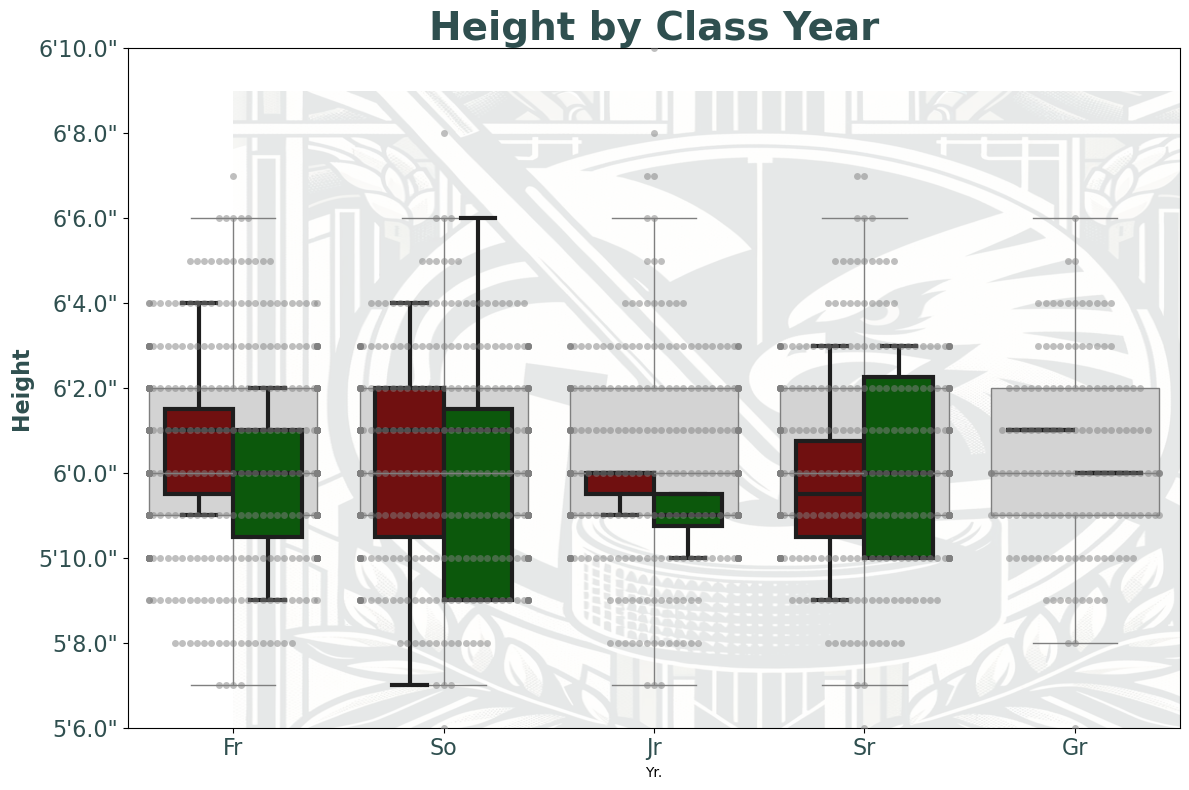

In [12]:
# Set the order of the class years
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']

# Create a subplot for the Box Plot with Swarm for height, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set Axis ranges
ax.set_xlim([0, 5])
ax.set_ylim([66, 81])

# Display the image
ax.imshow(img, aspect='auto', extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], alpha=0.1)  # Adjust alpha for opacity


# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Yr.', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=ax, order=class_order)
sns.swarmplot(x='Yr.', y='Height_Inches', data=df, color='grey', alpha=0.5, ax=ax, order=class_order)

# Create a box plot for Michigan State and Boston College to overlay on the base box plot
sns.boxplot(x='Yr.', y='Height_Inches', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=class_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3
            )

# Convert the tick mark labels to feet and inches and only use whole values like 6'1"
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'{int(tick/12)}\'{tick%12}"' for tick in ax.get_yticks()])

# Add title and labels
ax.set_title('Height by Class Year', fontdict=font_title_param)
# ax.set_xlabel('Class Year', fontdict=font_label_param)
ax.set_ylabel('Height', fontdict=font_label_param)
# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param) # Y axis

ax.get_legend().remove()

# Title for the plot
title = 'Height_by_Class_Year'

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
TEMP_FOLDER = '../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


## Weight By Position

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_19752\3580710465.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
C:\Users\Justin\AppData\Local\Temp\ipykernel_19752\3580710465.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdic

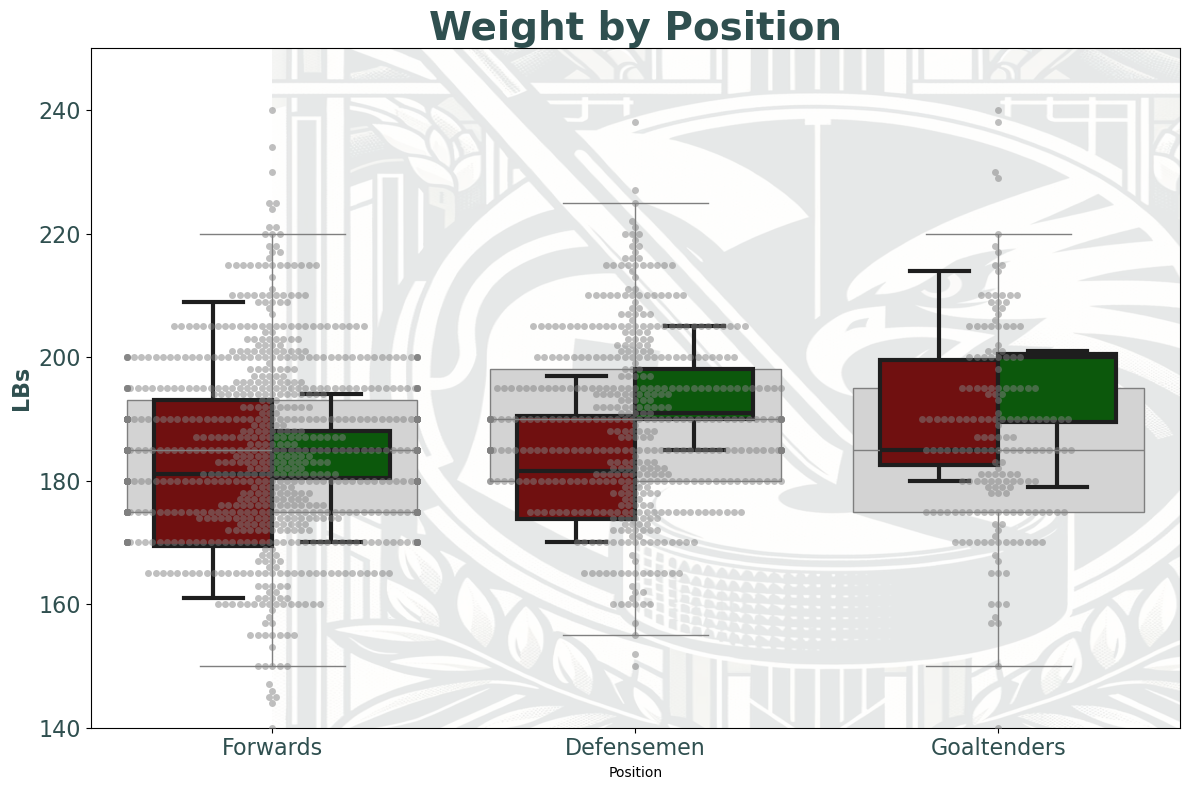

In [13]:
# Create a subplot for the Box Plot with Swarm for weight, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set Axis ranges
ax.set_xlim([0, 3])
ax.set_ylim([140, 250])

# Display the image
ax.imshow(img, aspect='auto', extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], alpha=0.1)  # Adjust alpha for opacity

# Create the base Box Plot with Swarm using the entire dataset for weight
sns.boxplot(x='Position', y='Wt.', data=df, color='lightgrey', showfliers=False, ax=ax, order=position_order)
sns.swarmplot(x='Position', y='Wt.', data=df, color='grey', alpha=0.5, ax=ax, order=position_order)

# Create a box plot for Michigan State and Boston College to overlay on the base box plot
sns.boxplot(x='Position', y='Wt.', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=position_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3
            )


# Add title and labels
ax.set_title('Weight by Position', fontdict=font_title_param)
# ax.set_xlabel('Position', fontdict=font_label_param)
ax.set_ylabel('LBs', fontdict=font_label_param)
# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param) # Y axis

# Title for the plot
title = 'Weight_By_Position'

ax.get_legend().remove()

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
TEMP_FOLDER = '../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()

## Weight By Class Year

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel

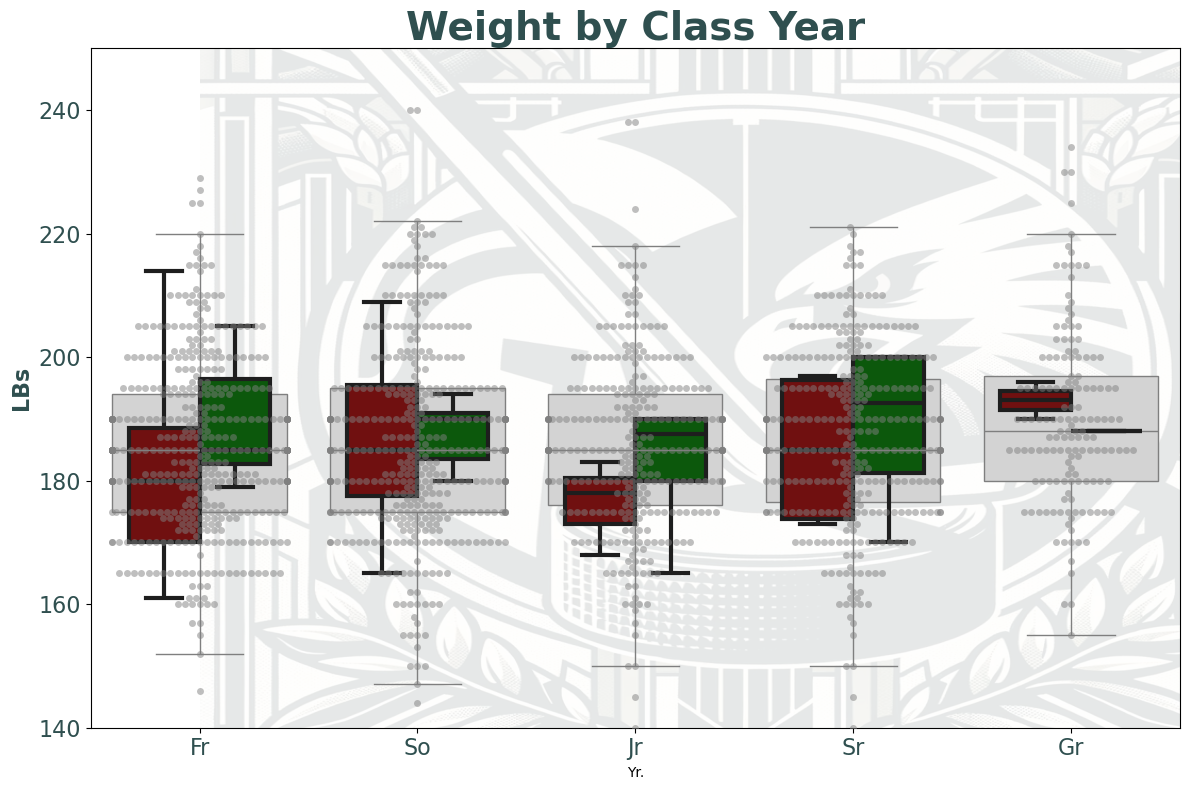

In [14]:


# Load the image
img = mpimg.imread('../images/backgrounds/bc2.png')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Set Axis ranges
ax.set_xlim([0, 5])
ax.set_ylim([140, 250])

# Display the image
ax.imshow(img, aspect='auto', extent=[ax.get_xlim()[0], ax.get_xlim()[1], ax.get_ylim()[0], ax.get_ylim()[1]], alpha=0.1)  # Adjust alpha for opacity

# Your existing code here
sns.boxplot(x='Yr.', y='Wt.', data=df, color='lightgrey', showfliers=False, ax=ax, order=class_order)
sns.swarmplot(x='Yr.', y='Wt.', data=df, color='grey', alpha=0.5, ax=ax, order=class_order)
sns.boxplot(x='Yr.', y='Wt.', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=class_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3)

# Add title and labels
ax.set_title('Weight by Class Year', fontdict=font_title_param)
# ax.set_xlabel('Class Year', fontdict=font_label_param)
ax.set_ylabel('LBs', fontdict=font_label_param)

# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)


# Drop Legend
ax.get_legend().remove()
plt.tight_layout()


# Title for the plot
title = 'Weight_By_Class'

plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)
plt.show()
